In [4]:
import json
import requests
import csv
import random
import time
import pandas as pd
import openweathermapy.core as ow
import matplotlib.pyplot as plt
from config import *
from citipy import citipy
from geopy.distance import vincenty

In [5]:
#OpenWeatherMap Settings
owm_settings = {"units": "imperial", "appid": api_key}

#Load OWM city list json file
owm_city_json = json.load(open('city.list.json', encoding='utf8'))

In [6]:
#WORKING#

city_count = 600
counter = 0

rangeLat = (-90, 90)
rangeLong = (-180, 180)

latitudes = []
longitudes = []

cities = []

print('Randomly selecting 600 cities...')
while counter != city_count:
    rand_lat = round(random.uniform(*rangeLat), 5)
    rand_long = round(random.uniform(*rangeLong), 5)
    rand_coord = (rand_lat, rand_long)
    city = citipy.nearest_city(rand_lat, rand_long)
    name = city.city_name
    country = city.country_code
    
    city_coord = ''
    for x in owm_city_json:
        if x['name'] == name.title() and x['country'] == country.upper():
            city_coord = (x['coord']['lat'], x['coord']['lon'])
            owm_id = x['id']
            lat = x['coord']['lat']
            long = x['coord']['lon']
            
    if city_coord != '' and owm_id not in cities:
        distance = vincenty(rand_coord, city_coord).miles #using vincenty since it's more accurate than great_circle, errors when handling antipodes is not an issue here since the closest city to any given coord will not be an antipode
        if distance <= 69: #at equator, each line of latitude is approximately 69 miles from the next line, same for longitude.  Eliminating random points that have no nearby city within one degree of lat/long
            cities.append(owm_id)
            counter = counter + 1

            latitudes.append(lat)
            longitudes.append(long)

            
print('...selection complete')

Randomly selecting 600 cities...
...selection complete


In [25]:
#Check generated city list for duplicates
duplicates = pd.Series(cities)
duplicates[duplicates.duplicated()]

Series([], dtype: int64)

In [7]:
#Export generated city list to csv
rows = zip(cities, latitudes, longitudes)
with open('my_city_list.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['id','lat','long'])
    for row in rows:
        for i, column in enumerate(row):
            f.write(str(column))
            if i != len(row)-1:
                f.write(',')
        f.write('\n')

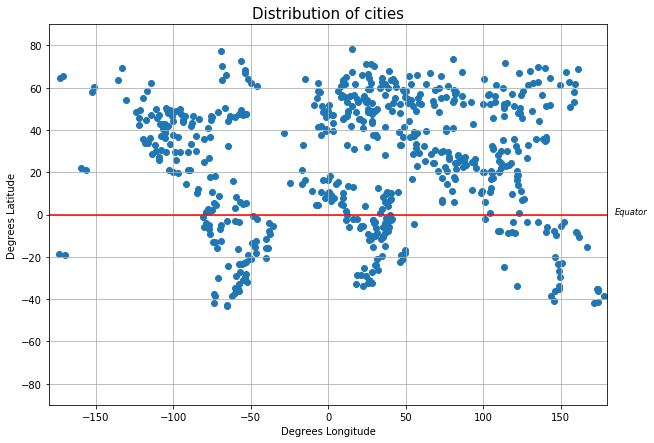

In [22]:
#Plot city locations to verify global distribution and no hidden clusters
plt.figure(figsize=(10,7))

plt.scatter(longitudes, latitudes)
plt.title('Distribution of cities', size='15')
plt.xlim(-180, 180)
plt.xlabel('Degrees Longitude')
plt.ylim(rangeLat)
plt.ylabel('Degrees Latitude')
plt.axhline(y=0, color='r', linestyle='-')
plt.text(185,0,'Equator', size='smaller', style='italic')
plt.grid()
plt.show()

Series([], dtype: int64)